Aluno: Artur Nilo Valle<br>
CAN22005 - CÁLCULO NUMÉRICO (2024 .1 - T01)<br>

## <b>Método de Bissecção
#### <b>Aula 3 - Raizes e Otimização - 1.3. Exercicios propostos

1. Calcule o comprimento do cabo (C) entre duas torres de
transmissão (i.e. a catenária) [4]. A distância entre as torres é de d
= 500m. A flecha máxima permitida é fmax = 50m. Flecha é a
distância vertical entre uma reta que liga os dois pontos de fixação,
conforme indicado na ilustração. A flecha depende do comprimento
do vão (d), da temperatura do cabo e da tração aplicada ao cabo
quando este é instalado. O seu modelo matemático pode ser:


#### <b>Resolução:

In [28]:
from math import cosh

# Modelo matematico da flecha em função do comprimento do cabo e da distância entre as torres
def func(C, d, fmax):
    res = C*(cosh(d/(2*C))-1)-fmax
    return res


In [29]:
x1 = 300 # Aproximação inicial (Comprimento do cabo)
x2 = 1000 # Aproximação final (Comprimento do cabo)
error_max = 0.0000001 #Erro máximo admitido
max_int = 50 # Número maximo de interações
dist = 500 # Distância entre as torres 
fmax = 50 # Valor determinado da flecha

# -----=-- Aquisição de pontos para gráfico da função base --------
x_values_in_range = []
func_values_in_range = []
for x in range(x1,x2):
    x_values_in_range.append(x)
    func_values_in_range.append(func(x, dist, fmax))

# print(x_values_in_range)
# print(func_values_in_range)
#  ----------------------------------------------------------------

# ----- Aquisição dos pontos utilizando o método de Bissecção -----
i = 0
x_values = []  # Lista para armazenar os valores de x (Comprimentos do cabo atribuidos)
func_values = []  # Lista para armazenar os resultados da função (Diferença entre a flecha esperada e a obtida a partir da função)

x_values.append(x1)
x_values.append(x2)
func_values.append(func(x1, dist, fmax))
func_values.append(func(x2, dist, fmax))
while(1):
    x = (x1+x2)/2 # Calcula o valor medio
    fx1 = func(x1, dist, fmax) # Calcula o valor da função com x1
    fx = func(x, dist, fmax) # Calcula o valor da função com x
    test = fx1*fx # testa o resultado das duas chamadas de função
    if test<0: # Se test for menor que 0
        x2=x # é por que a raiz está entre x e x1, novo valor de x2 é definido como x
    elif test>0: # Se test for maior que 0
        x1=x # é por que a raiz está entre x e x2, novo valor de x1 é definido como x
    else: # Se não caiu nas condições anteriores, o erro é 0, logo, o valor exato foi encontrado
        break
    e = abs(fx1-fx) # Calcula o erro absoluto
    if e <= error_max or i >= max_int: # Verifica se o erro está abaixo do estipulado ou se o numero maximo de interações foi ultrapassado
        break
    i = i + 1

    x_values.append(x)
    func_values.append(fx)

# print(x_values)
# print(func_values)
print("Raiz aproximada obtida: ", x)


Raiz aproximada obtida:  633.1621796824038


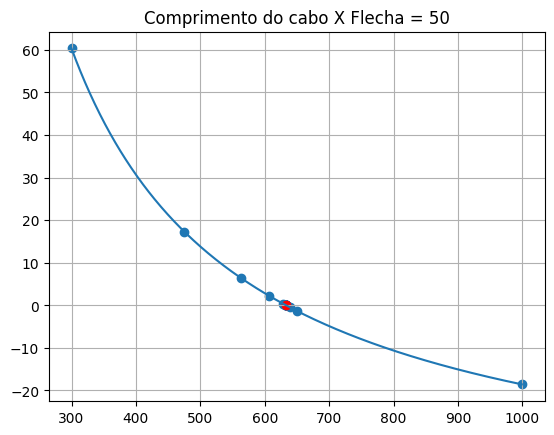

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x_values[:-1], func_values[:-1], label="f(x)" )
plt.scatter(x_values[-1], func_values[-1], color="red")
plt.plot(x_values_in_range, func_values_in_range, label="Pontos Bissecção" )
plt.title('Comprimento do cabo X Flecha = 50')
plt.grid(True)
plt.show()